In [10]:
import pandas as pd #Import pandas
import sys #Determine Python version number

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Pandas and python version

In [2]:
print('Python version' + sys.version)
print('Pandas version' + pd.__version__)

Python version3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version1.4.4


Read CSV File

In [4]:
loanscsv = pd.read_csv('loans_full_schema.csv')

Copy to new df, so that the changes wont affect the original df

In [5]:
df = loanscsv.copy()

Check variable data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

Ckeck for missing values

In [7]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

Display the first rows of df

In [8]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Wordcloud with the emp titles

In [39]:
text1 = df['emp_title'].dropna().to_string()

In [40]:
wordcloud = WordCloud(width=400,height=300,max_font_size=40, max_words=1000, background_color="white").generate(str(text1))

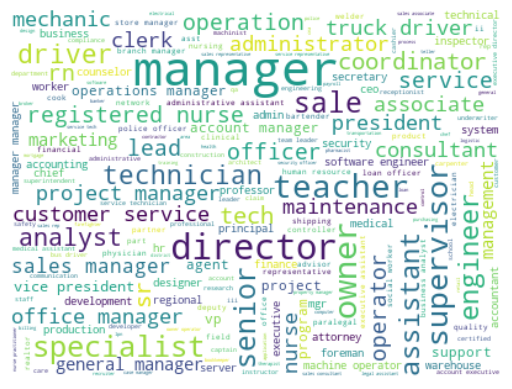

In [41]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Loan Status

In [42]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Charged Off', 'Late (16-30 days)'], dtype=object)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

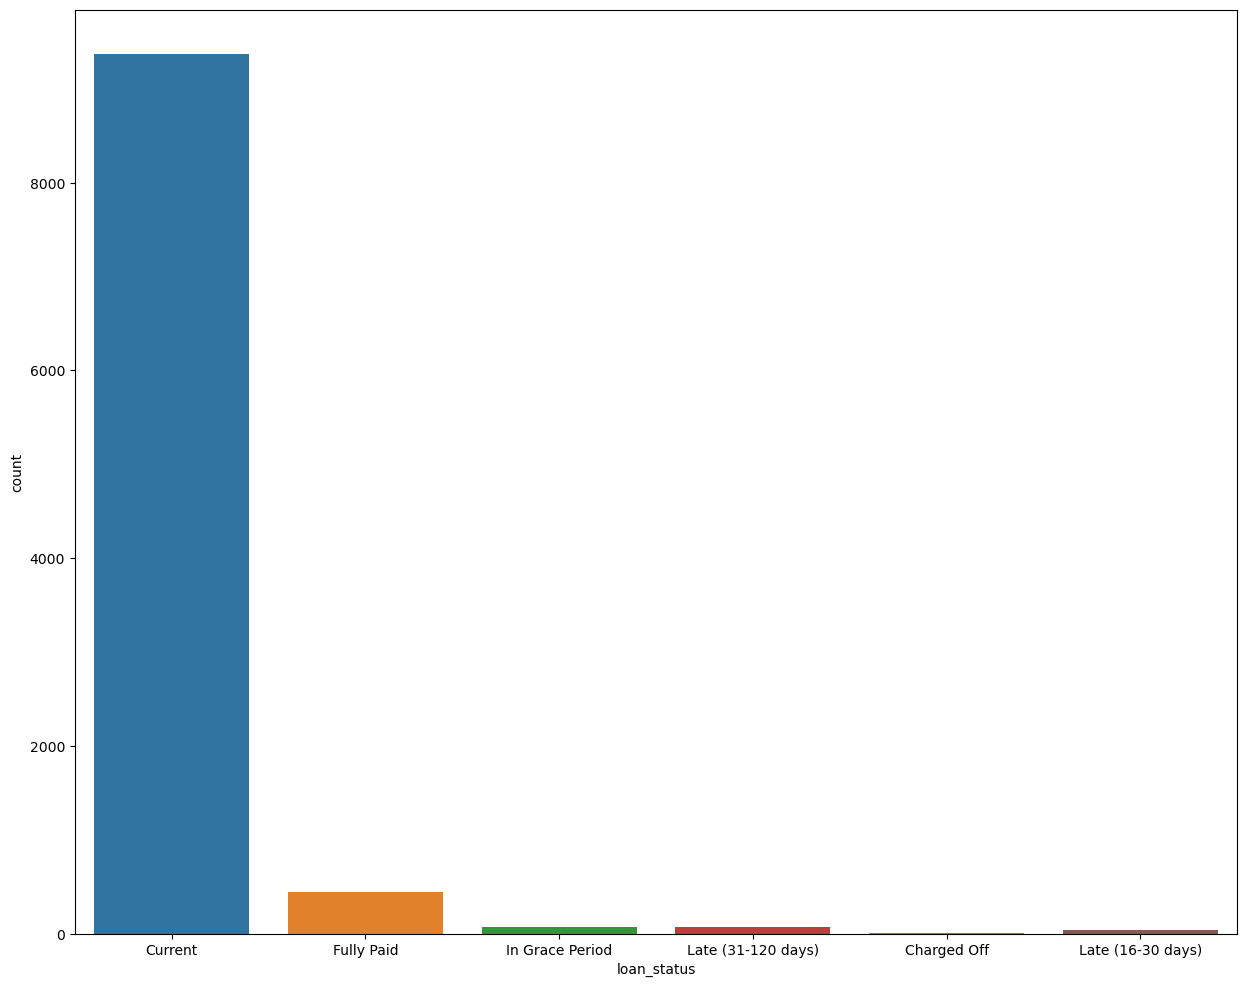

In [43]:
plt.figure(figsize=(15,12))
sns.countplot(x='loan_status',data=df)

Most of the loans are currently happening, the only loans that interest in this analysis is the fully paid and the charged off ones.

In [55]:
px.histogram(data_frame=df,x='loan_purpose',y='paid_total',color='loan_purpose',histfunc='avg',barmode='group')

C:\Users\mihos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



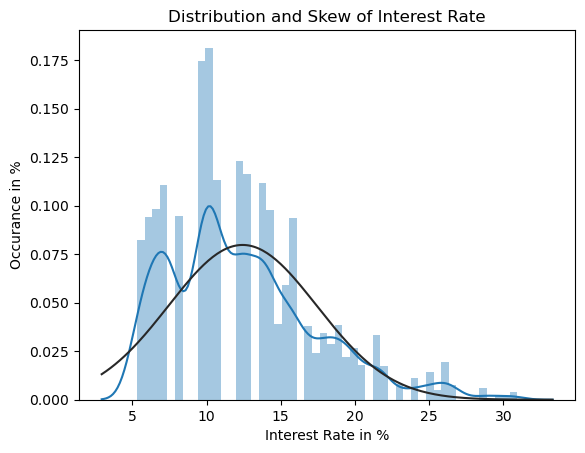

In [65]:
from scipy.stats import norm
sns.distplot(df['interest_rate'], fit=norm)
plt.title("Distribution and Skew of Interest Rate")
plt.xlabel("Interest Rate in %")
plt.ylabel("Occurance in %")
plt.show()

Distribution Plots are very similar to histograms and essentially show how data is distributed across its different values.
They are extremely useful in finding skews in the data. Most models perform best when the data they deal with is normally distributed (especially linear models). So if we find a skew we may want to apply a skew solution function the variable in order to make it resemble a normal distribution

The extended tail forward gives a clear sign of a positive skew in our interest rate. This means that there are much more lower values than there are high values. Possible solutions we could apply include the square root and log functions

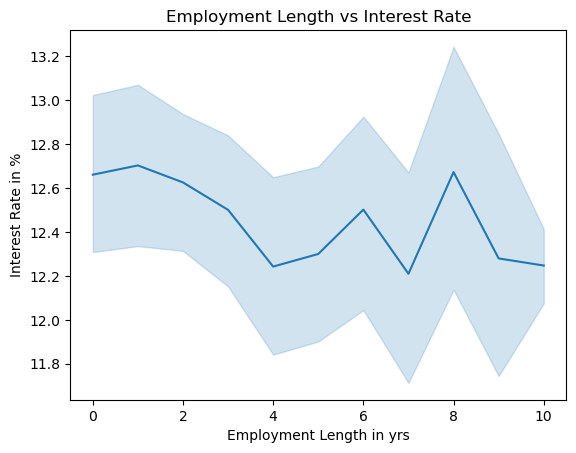

In [68]:
sns.lineplot(x=df['emp_length'], y=df['interest_rate'])
plt.title("Employment Length vs Interest Rate")
plt.xlabel("Employment Length in yrs")
plt.ylabel("Interest Rate in %")
plt.show()

It seems interest rate vs employment length shows some non-linear relation with a clear drop in average interest rate from working 8 years to working 10 years, probably because stability in occupation is a sign of lower risk. 